In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import os
import re

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [109]:
#Daten einlesen
RELPATH = '/home/ki-projekt/KI-Projekt/data/TennesseEastman/'

data = []
dataTE = []
index = 0
indexTE = 0

# Dateien einlesen ############# aktuelles Problem: die Daten werden nicht der Reihe nach eingelesen ############
for datei in os.listdir(RELPATH):
    filePath = os.path.join(RELPATH, datei)

    number_match = re.search(r'\d+', datei)
    if number_match:
        number = int(number_match.group())

        print(f'Found file: {filePath}, Number: {number}')

        with open(filePath, 'r') as file:
            lines = file.read().splitlines()

            if 'te' in datei:
                while len(dataTE) <= number:
                    dataTE.append([])  # Füge neue Listen hinzu, wenn der Index größer als die Länge von dataTE ist
                dataTE[number] = np.transpose([list(map(float, line.split()[:52])) for line in lines])[:, :480]
            else:
                while len(data) <= number:
                    data.append([])  # Füge neue Listen hinzu, wenn der Index größer als die Länge von data ist
                temp_data = [list(map(float, line.split()[:480])) for line in lines]
                if len(temp_data) > 52:
                    data[number] = np.transpose(temp_data)
                else:
                    data[number] = temp_data

matrix_data = np.array(data)
matrix_dataTE = np.array(dataTE)

Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d12.dat, Number: 12
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d20.dat, Number: 20
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d08_te.dat, Number: 8
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d04_te.dat, Number: 4
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d06.dat, Number: 6
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d20_te.dat, Number: 20
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d00.dat, Number: 0
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d02.dat, Number: 2
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d16_te.dat, Number: 16
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d19_te.dat, Number: 19
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d05.dat, Number: 5
Found file: /home/ki-projekt/KI-Projekt/data/TennesseEastman/d09.dat, Number: 9
Found file: /home/ki

In [114]:
print(matrix_data.shape)
print(matrix_data.dtype)

print(matrix_dataTE.shape)
print(matrix_dataTE.dtype)

(22, 52, 480)
float64
(22, 52, 480)
float64


Text(0, 0.5, 'Werte')

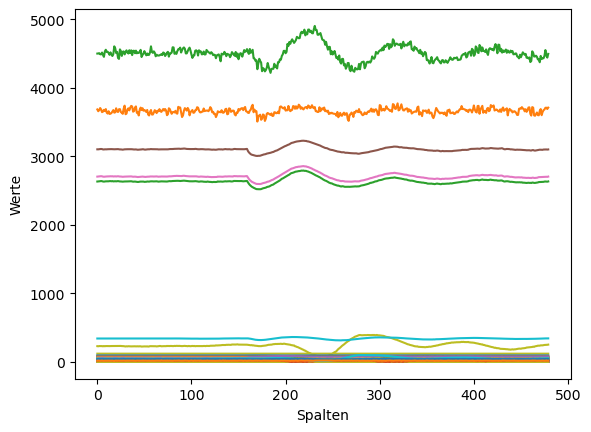

In [116]:
# Beispiel: Plot der ersten Zeile
# matrix_data[Fehler(-1), ]
plt.plot(np.transpose(matrix_dataTE[7]))
plt.xlabel('Spalten')
plt.ylabel('Werte')

In [7]:
# Annahme: my_data enthält deine Daten mit dem korrekten Verlauf in der ersten Spalte und den Fehlern in den folgenden Spalten
my_data = matrix_data 

In [8]:
# Daten vorbereiten
X = my_data[:, 0].reshape(-1, 1)  # Eingangsdaten: Korrekter Verlauf
y = my_data[:, 1:]  # Zielvariablen: Fehlerklassen

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1092, 21]

In [ ]:
# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modell erstellen (LSTM)
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Modell trainieren
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

In [ ]:
# Modellbewertung
train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

In [ ]:
# Confusion Matrix
y_pred = model.predict_classes(X_test_scaled)
y_true = [i.argmax() for i in y_test]
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
# Classification Report
class_report = classification_report(y_true, y_pred)
print('Classification Report:')
print(class_report)